In [82]:
import pandas as pd
import csv as csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("train.csv").replace("male", 0).replace("female", 1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [84]:
df["Age"].head()
#欠損処理 by median
df["Age"].fillna(df.Age.median(), inplace = True)
df["Age"].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [88]:
df["FamiliySize"] = df["SibSp"] + df["Parch"] + 1 #Familiysizeを親族＋子供の数＋本人で算出。同部屋の可能性などを探る。
df_dropped = df.drop(["Name", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked", "PassengerId"], axis = 1)#関係ない奴、Familysizeに統合された奴は省いたDf作成。

In [89]:
df_dropped.head()

,Survived,Pclass,Sex,Age,FamiliySize
0,0,3,0,22.0,2
1,1,1,1,38.0,2
2,1,3,1,26.0,1
3,1,1,1,35.0,2
4,0,3,0,35.0,1


In [90]:
#パーセプトロンを利用するためにheatmapにとして可視化して相関係数が高い変数を二つ選ぶ

In [91]:
#相関係数を算出
corrmat = df_dropped.corr()
corrmat

,Survived,Pclass,Sex,Age,FamiliySize
Survived,1.000000,-0.338481,0.543351,-0.064910,0.016639
Pclass,-0.338481,1.000000,-0.131900,-0.339898,0.065997
Sex,0.543351,-0.131900,1.000000,-0.081163,0.200988
Age,-0.064910,-0.339898,-0.081163,1.000000,-0.245619
FamiliySize,0.016639,0.065997,0.200988,-0.245619,1.000000


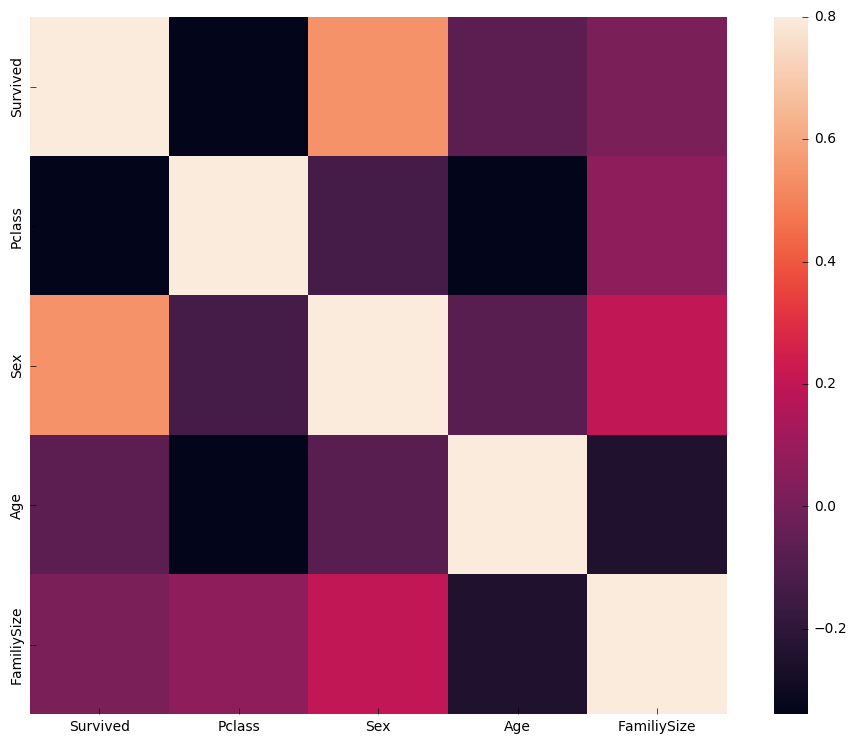

In [92]:
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [97]:
#Sex and Pclassが高そうだから選ぶ
x = df_dropped.loc[:,["Sex", "Pclass"]]
y = df_dropped.loc[:,["Survived"]] #Survivedの被説明変数を格納
# データの標準化、分類系では基本標準化した方が良い
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x_std = scaler.transform(x)
x_std

array([[-0.73769513,  0.82737724],
       [ 1.35557354, -1.56610693],
       [ 1.35557354,  0.82737724],
       ..., 
       [ 1.35557354,  0.82737724],
       [-0.73769513, -1.56610693],
       [-0.73769513,  0.82737724]])

In [98]:
# データセットの分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_std, y, test_size=0.3, random_state=0)
# パーセプトロンを用いて学習を行う
from sklearn.linear_model import Perceptron
ppn_1 = Perceptron(eta0=0.1) # 学習率 0.1
ppn_1.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=5, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [99]:
# 正答率を出力
print('train acc: %.3f' % ppn_1.score(X_train, y_train))
print('test acc: %.3f' % ppn_1.score(X_test, y_test))

train acc: 0.787
test acc: 0.787


In [104]:
#テストデータも同じ処理をしてreal_testを作成
df_test = pd.read_csv("test.csv").replace("male", 0).replace("female", 1)
#Sex and Pclassが高そうだから選ぶ
x_real_test = df_test.loc[:,["Sex", "Pclass"]]

# データの標準化、分類系では基本標準化した方が良い
scaler.fit(x_real_test)
x_test_std = scaler.transform(x_real_test)
x_test_std[:10]

array([[-0.75592895,  0.87348191],
       [ 1.32287566,  0.87348191],
       [-0.75592895, -0.31581919],
       [-0.75592895,  0.87348191],
       [ 1.32287566,  0.87348191],
       [-0.75592895,  0.87348191],
       [ 1.32287566,  0.87348191],
       [-0.75592895, -0.31581919],
       [ 1.32287566,  0.87348191],
       [-0.75592895,  0.87348191]])

In [105]:
#モデルにX_test_std入れて予測
output = ppn_1.predict(x_test_std)
len(output)

418

In [108]:
#予測結果とPassIDをZipする
zip_data = zip(df_test["PassengerId"].astype(int), output.astype(int))
predict_data = list(zip_data)
predict_data[:10] #予測結果の一部を出力。

[(892, 0),
 (893, 1),
 (894, 0),
 (895, 0),
 (896, 1),
 (897, 0),
 (898, 1),
 (899, 0),
 (900, 1),
 (901, 0)]

In [109]:
# テスト値を再読み込みして，rfでクラス分類したカラムを追加
df_out = pd.read_csv("./test.csv")
df_out["Survived"] = output

# outputディレクトリに出力する
df_out[["PassengerId","Survived"]].to_csv("./submission_perceptron.csv",index=False)